# Data Collenction and Manipulation

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('nfl_dataset.csv')
data

FileNotFoundError: ignored

In [1]:
df = pd.Dataframe()

NameError: ignored

In [ ]:
data['fd_diff'] = data['first_downs_away'] - data['first_downs_home']
data['third_downs_away_pct'] = (data['third_downs_away'].str.extract('(\d+)-', expand=False)).astype(float) / (data['third_downs_away'].str.extract('-(\d+)', expand=False)).astype(float)
data['third_downs_home_pct'] = (data['third_downs_home'].str.extract('(\d+)-', expand=False)).astype(float) / (data['third_downs_home'].str.extract('-(\d+)', expand=False)).astype(float)
data['third_down_pct_diff'] = data['third_downs_away_pct'] - data['third_downs_home_pct']
data['pass_diff'] = data['passing_yards_away'] - data['passing_yards_home']
data['rush_diff'] = data['rushing_yards_away'] - data['rushing_yards_home']
data['total_diff'] = data['total_yards_away'] - data['total_yards_home']
data['comp_away_pct'] = (data['comp_att_away'].str.extract('(\d+)-', expand=False)).astype(float) / (data['comp_att_away'].str.extract('-(\d+)', expand=False)).astype(float)
data['comp_home_pct'] = (data['comp_att_home'].str.extract('(\d+)-', expand=False)).astype(float) / (data['comp_att_home'].str.extract('-(\d+)', expand=False)).astype(float)
data['comp_pct_diff'] = data['comp_away_pct'] - data['comp_home_pct']
data['sack_diff'] = (data['sacks_away'].str.extract('(\d+)-', expand=False)).astype(int) - (data['sacks_home'].str.extract('(\d+)-', expand=False)).astype(int)
data['rush_att_diff'] = data['rushing_attempts_away'] - data['rushing_attempts_home']
data['funble_diff'] = data['fumbles_away'] - data['fumbles_home']
data['int_diff'] = data['int_away'] - data['int_home']
data['turnover_diff'] = data['turnovers_away'] - data['turnovers_home']
data['num_penalty_diff'] = (data['penalties_away'].str.extract('(\d+)-', expand=False)).astype(int) - (data['penalties_home'].str.extract('(\d+)-', expand=False)).astype(int)
data['yard_penalty_diff'] = (data['penalties_away'].str.extract('-(\d+)', expand=False)).astype(int) - (data['penalties_home'].str.extract('-(\d+)', expand=False)).astype(int)
data['redzone_pct_away'] = (data['redzone_away'].str.extract('(\d+)-', expand=False)).astype(float) / (data['redzone_away'].str.extract('-(\d+)', expand=False)).astype(float)
data['redzone_pct_home'] = (data['redzone_home'].str.extract('(\d+)-', expand=False)).astype(float) / (data['redzone_home'].str.extract('-(\d+)', expand=False)).astype(float)
data['redzone_diff'] = data['redzone_pct_away'] - data['redzone_pct_home']
data['drive_diff'] = data['drives_away'] - data['drives_home']
data['dtdst_diff'] = data['def_st_td_away'] - data['def_st_td_home']
data['top_away'] = ((data['possession_away'].str.extract('(\d+):', expand=False)).astype(int)*60) + (data['possession_away'].str.extract(':(\d+)', expand=False)).astype(int)
data['top_home'] = ((data['possession_home'].str.extract('(\d+):', expand=False)).astype(int)*60) + (data['possession_home'].str.extract(':(\d+)', expand=False)).astype(int)
data['top_diff'] = data['top_away'] - data['top_home']
data['score_diff'] = data['score_away'] - data['score_home']
data.head(1)

,date,away,home,first_downs_away,first_downs_home,third_downs_away,third_downs_home,fourth_downs_away,fourth_downs_home,passing_yards_away,passing_yards_home,rushing_yards_away,rushing_yards_home,total_yards_away,total_yards_home,comp_att_away,comp_att_home,sacks_away,sacks_home,rushing_attempts_away,rushing_attempts_home,fumbles_away,fumbles_home,int_away,int_home,turnovers_away,turnovers_home,penalties_away,penalties_home,redzone_away,redzone_home,drives_away,drives_home,def_st_td_away,def_st_td_home,possession_away,possession_home,score_away,score_home,fd_diff,third_downs_away_pct,third_downs_home_pct,third_down_pct_diff,pass_diff,rush_diff,total_diff,comp_away_pct,comp_home_pct,comp_pct_diff,sack_diff,rush_att_diff,funble_diff,int_diff,turnover_diff,num_penalty_diff,yard_penalty_diff,redzone_pct_away,redzone_pct_home,redzone_diff,drive_diff,dtdst_diff,top_away,top_home,top_diff,score_diff
0,2002-09-05,49ers,Giants,13,21,4-12,9-16,0-0,0-1,166,318,113,43,279,361,16-26,28-45,0-0,3-24,25,22,0,0,1,3,1,3,5-29,10-80,0-8,0-6,13,15,0,0,27:32,32:28,16,13,-8,0.333333,0.5625,-0.229167,-152,70,-82,0.615385,0.622222,-0.006838,-3,3,0,-2,-2,-5,-51,0.0,0.0,0.0,-2,0,1652,1948,-296,3


In [ ]:
data = data[['fd_diff', 'third_down_pct_diff', 'pass_diff', 'rush_diff', 'total_diff', 'comp_pct_diff', 'sack_diff', 'rush_att_diff', 'funble_diff', 'int_diff', 'turnover_diff', 'num_penalty_diff', 'yard_penalty_diff', 'redzone_diff', 'drive_diff', 'dtdst_diff','top_diff', 'score_diff']]
data.columns = ['first_downs', 'third_down_pct', 'pass_yards', 'rush_yards', 'total_yards', 'comp_pct', 'sacks', 'rush_att', 'fumble', 'int', 'turnovers', 'num_penalty', 'penalty_yards', 'redzone_pct', 'drives', 'def_td_stands', 'possession', 'score']
data.head(1)

,first_downs,third_down_pct,pass_yards,rush_yards,total_yards,comp_pct,sacks,rush_att,fumble,int,turnovers,num_penalty,penalty_yards,redzone_pct,drives,def_td_stands,possession,score
0,-8,-0.229167,-152,70,-82,-0.006838,-3,3,0,-2,-2,-5,-51,0.0,-2,0,-296,3


# EDA

In [ ]:
data.head(1)

,first_downs,third_down_pct,pass_yards,rush_yards,total_yards,comp_pct,sacks,rush_att,fumble,int,turnovers,num_penalty,penalty_yards,redzone_pct,drives,def_td_stands,possession,score
0,-8,-0.229167,-152,70,-82,-0.006838,-3,3,0,-2,-2,-5,-51,0.0,-2,0,-296,3


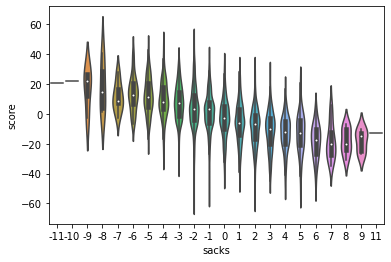

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.violinplot(x='sacks', y='score', data=data)

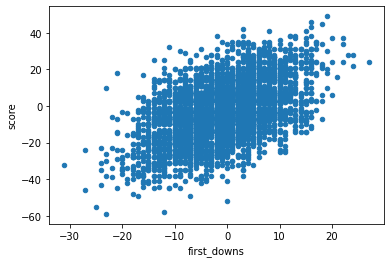

In [ ]:
data.plot.scatter('first_downs', 'score')

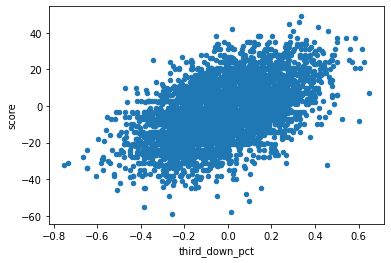

In [ ]:
data.plot.scatter('third_down_pct', 'score')

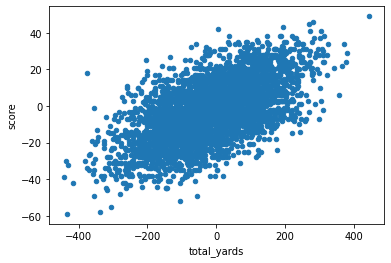

In [ ]:
data.plot.scatter('total_yards', 'score')

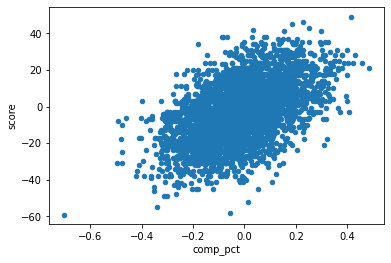

In [ ]:
data.plot.scatter('comp_pct', 'score')

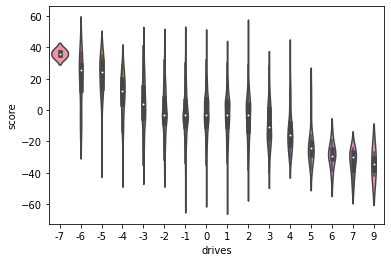

In [ ]:
sns.violinplot(x='drives', y='score', data=data)

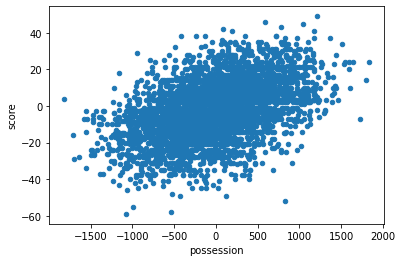

In [ ]:
data.plot.scatter('possession', 'score')

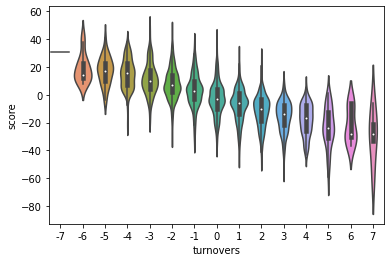

In [ ]:
sns.violinplot(x='turnovers', y='score', data=data)

# Modeling

In [ ]:
data = data.dropna()
X = data[['first_downs', 'third_down_pct', 'pass_yards', 'rush_yards', 'total_yards', 'comp_pct', 'sacks', 'rush_att', 'fumble', 'int', 'turnovers', 'num_penalty', 'penalty_yards', 'redzone_pct', 'drives', 'def_td_stands', 'possession']]
y = data['score']

In [ ]:
import sklearn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_validate
# Creating a linear discriminant analysis model
clf = LinearDiscriminantAnalysis()

from sklearn.model_selection import train_test_split
# Splitting the data up 80%-20% for train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

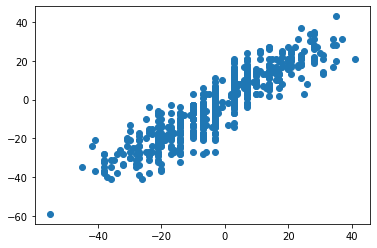

In [ ]:
plt.scatter(pred, y_test)

In [ ]:
df = pd.DataFrame({'Predicted':pred, 'Actual':y_test})
df['residual'] = abs(df['Predicted'] - df['Actual'])
df['residual'].mean()
df['w'] = ((df['Actual']>0) & (df['Predicted']>0) | (df['Actual']<0) & (df['Predicted']<0) | (df['Actual']==0) & (df['Predicted']==0)).astype(int)
df['w'].mean()

0.9037304452466908

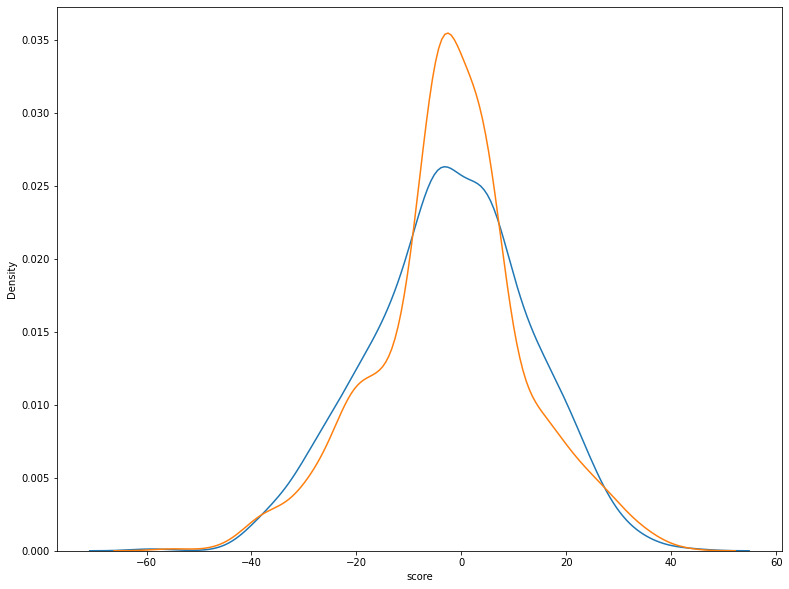

In [ ]:
f, ax = plt.subplots(figsize=(13,10))
sns.kdeplot(y_test, label="Actual", ax=ax)
sns.kdeplot(pred, label="Linear Regression Predictions", ax=ax)
plt.show()

In [ ]:
clf = LinearDiscriminantAnalysis()

from sklearn.model_selection import train_test_split
# Splitting the data up 80%-20% for train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
df = pd.DataFrame({'Predicted':pred, 'Actual':y_test})
df['residual'] = abs(df['Predicted'] - df['Actual'])
df['residual'].mean()

5.054151624548736